In [22]:
using RDatasets, LinearAlgebra

In [80]:
using Plots, Optim, StatsBase

In [233]:
data_pressure = dataset("datasets", "pressure")

,Temperature,Pressure
,Int64,Float64
1,0,0.0002
2,20,0.0012
3,40,0.006
4,60,0.03
5,80,0.09
6,100,0.27
7,120,0.75
8,140,1.85
9,160,4.2


In [234]:
names(data_pressure)

2-element Vector{Symbol}:
 :Temperature
 :Pressure

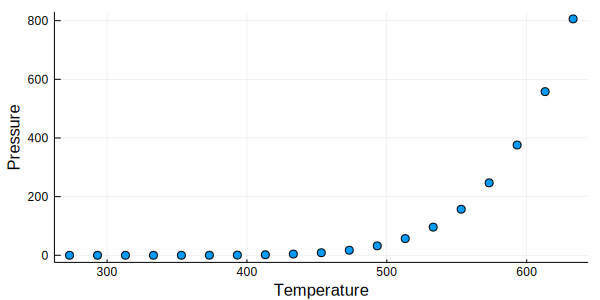

In [256]:
scatter(273.15.+data_pressure[:,1], data_pressure[:,2], 
            legend=false,
            xlabel = "Temperature",
            ylabel = "Pressure",
            size = (600,300))

In [257]:
k = size(data_pressure, 1)
n = round(Int, k * 0.75);

In [258]:
i_training = sample(1:k, n, replace = false)
X = -1 ./(273.15 .+ data_pressure[i_training,1])
Y = log10.(data_pressure[i_training,2])

14-element Vector{Float64}:
  2.906335041805091
  2.1958996524092336
 -3.6989700043360187
 -1.0457574905606752
  1.7558748556724915
 -0.5686362358410126
 -2.221848749616356
 -1.5228787452803376
  1.2380461031287955
  0.9444826721501687
  0.26717172840301384
 -2.9208187539523753
  2.7466341989375787
 -0.12493873660829995

In [259]:
i_test = setdiff(1:k, i_training)
X_test = -1 ./ (273.15 .+ data_pressure[i_test,1]);
Y_test = log10.(data_pressure[i_test,2]);

In [260]:
Ω = [ones(n) X]

14×2 Matrix{Float64}:
 1.0  -0.0015794
 1.0  -0.00180783
 1.0  -0.00366099
 1.0  -0.00283166
 1.0  -0.00194875
 1.0  -0.00267989
 1.0  -0.00319336
 1.0  -0.00300165
 1.0  -0.00211349
 1.0  -0.00220677
 1.0  -0.00242043
 1.0  -0.00341122
 1.0  -0.00163092
 1.0  -0.00254356

In [261]:
θ_ERM = pinv(Ω)*Y

2-element Vector{Float64}:
    7.941134536555896
 3175.150331622029

In [262]:
println("a = $(θ_ERM[1]), b = $(θ_ERM[2])") #log10(P) = a - b/x

a = 7.941134536555896, b = 3175.150331622029


In [263]:
Y[:]

14-element Vector{Float64}:
  2.906335041805091
  2.1958996524092336
 -3.6989700043360187
 -1.0457574905606752
  1.7558748556724915
 -0.5686362358410126
 -2.221848749616356
 -1.5228787452803376
  1.2380461031287955
  0.9444826721501687
  0.26717172840301384
 -2.9208187539523753
  2.7466341989375787
 -0.12493873660829995

In [264]:
θ_ERM[1] .+ θ_ERM[2].*X[:]

14-element Vector{Float64}:
  2.9262876098844446
  2.2010091969156003
 -3.683065835481554
 -1.0498050970899468
  1.7535669020980773
 -0.5679109722797717
 -2.1982565910890974
 -1.5895583393919646
  1.2304712550975232
  0.9342928028649995
  0.25591044936715157
 -2.89001105997158
  2.7627110975572347
 -0.13504588216985614

In [265]:
f(u) = θ_ERM[1] + u * θ_ERM[2]

f (generic function with 2 methods)

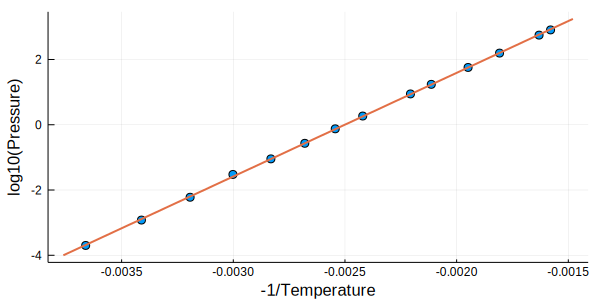

In [266]:
scatter(X,Y, legend=false, 
            xlabel = "-1/Temperature",
            ylabel = "log10(Pressure)",
            size = (600,300))
plot!(f, minimum(X)-0.0001, maximum(X)+0.0001, lw = 2)

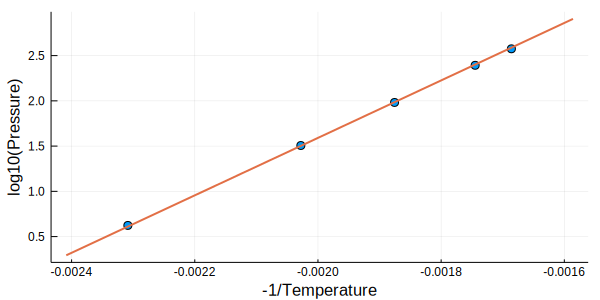

In [267]:
scatter(X_test,Y_test, legend=false, 
            xlabel = "-1/Temperature",
            ylabel = "log10(Pressure)",
            size = (600,300))
plot!(f, minimum(X_test)-0.0001, maximum(X_test)+0.0001, lw = 2)